In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("../derived/final_stats_data.csv",low_memory=False)

In [3]:
df.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam', 'City', 'Date', 'Season',
       'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner', 'TossDecision',
       'SuperOver', 'WinningTeam', 'WonBy', 'Margin', 'method',
       'Player_of_Match', 'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2',
       'BowlingTeam', 'batter_matches_played', 'runs_scored', 'dismissals',
       'balls_faced', '0s_scored', '1s_scored', '2s_scored', '4s_scored',
       '6s_scored', 'high_score', '25_scored', '50_scored', '75_scored',
       '100_scored', 'strike_rate_x', 'batting_average', 'notout',
       'explosivity_rating', '0_wickets_taken', '1_wickets_taken',
       '2_wickets_taken', '3_wickets_taken', '4_wickets_taken',
       '5_wickets_taken', '6_wickets_taken', 'bowler_matches_played',
       

In [4]:
len(df.columns)

82

adding delivery type column


In [5]:
df['total_run'].unique()

array([0, 1, 4, 6, 3, 2, 5, 7], dtype=int64)

In [6]:
df['delivery_type'] = df['total_run'].astype(str)

In [7]:
df['delivery_type'].unique()

array(['0', '1', '4', '6', '3', '2', '5', '7'], dtype=object)

In [8]:
df.shape

(222746, 83)

removing some columns


In [9]:
df.drop(['non-striker', 'extra_type',
       'non_boundary', 'player_out', 'kind',
       'fielders_involved', 'City','MatchNumber','SuperOver',
       'WonBy', 'Margin', 'method','Player_of_Match',
       'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2',
       'WinningTeam', 'Team2','Date','Team1','Venue','TossWinner','batter','bowler'], axis = 1, inplace = True)

In [10]:
df.columns.tolist()

['ID',
 'innings',
 'overs',
 'ballnumber',
 'batsman_run',
 'extras_run',
 'total_run',
 'isWicketDelivery',
 'BattingTeam',
 'Season',
 'TossDecision',
 'BowlingTeam',
 'batter_matches_played',
 'runs_scored',
 'dismissals',
 'balls_faced',
 '0s_scored',
 '1s_scored',
 '2s_scored',
 '4s_scored',
 '6s_scored',
 'high_score',
 '25_scored',
 '50_scored',
 '75_scored',
 '100_scored',
 'strike_rate_x',
 'batting_average',
 'notout',
 'explosivity_rating',
 '0_wickets_taken',
 '1_wickets_taken',
 '2_wickets_taken',
 '3_wickets_taken',
 '4_wickets_taken',
 '5_wickets_taken',
 '6_wickets_taken',
 'bowler_matches_played',
 'runs_conceded',
 'extras_runs_conceded',
 'wickets_taken',
 'balls_bowled',
 '4s_conceded',
 '6s_conceded',
 '0s_conceded',
 '1s_conceded',
 '2s_conceded',
 'highest_conceded',
 'strike_rate_y',
 'bowling_average',
 'economy',
 'total_runs_conceded',
 'target',
 'current_score',
 'balls_left',
 'wickets_left',
 'runs_left',
 'delivery_type']

Encoding some categorical columns


In [11]:
from sklearn.preprocessing import OneHotEncoder

# Assuming 'df' is your DataFrame
columns_to_encode = ['Season', 'BattingTeam', 'BowlingTeam','delivery_type','TossDecision']

# Initialize the encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform on the training data
encoder.fit(df[columns_to_encode])

# Transform the specified categorical columns to one-hot encoded representation
one_hot_encoded = encoder.transform(df[columns_to_encode])

# Concatenate the one-hot encoded features with the original DataFrame
df = pd.concat([df, pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns_to_encode))], axis=1)

# Drop the original categorical columns
df = df.drop(columns_to_encode, axis=1)

scaling


In [12]:
df.columns.tolist()

['ID',
 'innings',
 'overs',
 'ballnumber',
 'batsman_run',
 'extras_run',
 'total_run',
 'isWicketDelivery',
 'batter_matches_played',
 'runs_scored',
 'dismissals',
 'balls_faced',
 '0s_scored',
 '1s_scored',
 '2s_scored',
 '4s_scored',
 '6s_scored',
 'high_score',
 '25_scored',
 '50_scored',
 '75_scored',
 '100_scored',
 'strike_rate_x',
 'batting_average',
 'notout',
 'explosivity_rating',
 '0_wickets_taken',
 '1_wickets_taken',
 '2_wickets_taken',
 '3_wickets_taken',
 '4_wickets_taken',
 '5_wickets_taken',
 '6_wickets_taken',
 'bowler_matches_played',
 'runs_conceded',
 'extras_runs_conceded',
 'wickets_taken',
 'balls_bowled',
 '4s_conceded',
 '6s_conceded',
 '0s_conceded',
 '1s_conceded',
 '2s_conceded',
 'highest_conceded',
 'strike_rate_y',
 'bowling_average',
 'economy',
 'total_runs_conceded',
 'target',
 'current_score',
 'balls_left',
 'wickets_left',
 'runs_left',
 'Season_2008',
 'Season_2009',
 'Season_2010',
 'Season_2011',
 'Season_2012',
 'Season_2013',
 'Season_2014

In [13]:
# Specify the columns to scale
columns_to_scale = ['strike_rate_x', 'batting_average', 'strike_rate_y', 'bowling_average',
                    'economy','runs_conceded','runs_scored','balls_faced','balls_bowled',
                    'batter_matches_played','0s_scored', '1s_scored', '2s_scored', '4s_scored', '6s_scored',
                     'high_score', '25_scored', '50_scored', '75_scored', '100_scored','0_wickets_taken', '1_wickets_taken',
                    '2_wickets_taken', '3_wickets_taken', '4_wickets_taken', '5_wickets_taken','6_wickets_taken',
                    'bowler_matches_played','wickets_taken','4s_conceded','6s_conceded', '0s_conceded', '1s_conceded',
                    '2s_conceded', 'highest_conceded',]

In [14]:
print(df[columns_to_scale].max())
print(df[columns_to_scale].min())
print(df[columns_to_scale].isnull().sum())

strike_rate_x             400.0
batting_average             inf
strike_rate_y               inf
bowling_average             inf
economy                    36.0
runs_conceded            4249.0
runs_scored              6462.0
balls_faced              5049.0
balls_bowled             3778.0
batter_matches_played     221.0
0s_scored                1910.0
1s_scored                2159.0
2s_scored                 371.0
4s_scored                 692.0
6s_scored                 336.0
high_score                175.0
25_scored                  65.0
50_scored                  53.0
75_scored                  17.0
100_scored                  6.0
0_wickets_taken            96.0
1_wickets_taken            72.0
2_wickets_taken            43.0
3_wickets_taken            17.0
4_wickets_taken             9.0
5_wickets_taken             3.0
6_wickets_taken             1.0
bowler_matches_played     180.0
wickets_taken             207.0
4s_conceded               423.0
6s_conceded               176.0
0s_conce

In [15]:
# Replace infinite or too large values with the median
df[columns_to_scale] = df[columns_to_scale].replace([np.inf, -np.inf], np.nan)
df[columns_to_scale] = df[columns_to_scale].fillna(df[columns_to_scale].median())

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:
df.head(5)

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.1965

In [19]:
df[columns_to_scale].describe()

,strike_rate_x,batting_average,strike_rate_y,bowling_average,economy,runs_conceded,runs_scored,balls_faced,balls_bowled,batter_matches_played,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,wickets_taken,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded
count,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000,222746.000000
mean,0.320637,0.316318,0.232376,0.199324,0.213792,0.419453,0.375506,0.365394,0.378899,0.427199,0.386335,0.334523,0.324316,0.325016,0.268994,0.502836,0.358853,0.279567,0.201986,0.140504,0.260785,0.320657,0.316903,0.309432,0.169038,0.125219,0.018483,0.379471,0.358437,0.374572,0.372122,0.387526,0.315353,0.348813,0.710717
std,0.039379,0.091848,0.065158,0.061535,0.022349,0.285295,0.282744,0.272000,0.269443,0.280213,0.278382,0.259950,0.256662,0.252563,0.228103,0.179961,0.264734,0.260836,0.232512,0.230518,0.192334,0.231803,0.241171,0.264097,0.205720,0.223443,0.134690,0.263435,0.262066,0.255922,0.266288,0.278380,0.241347,0.258430,0.117371
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.303583,0.261364,0.196584,0.169345,0.198786,0.177924,0.139740,0.132132,0.152502,0.186364,0.143455,0.113015,0.121294,0.106936,0.086310,0.405714,0.138462,0.056604,0.000000,0.000000,0.114583,0.138889,0.116279,0.058824,0.000000,0.000000,0.000000,0.162011,0.140097,0.163121,0.159091,0.152160,0.126286,0.141264,0.652174
50%,0.320718,0.317308,0.221505,0.188586,0.211974,0.387856,0.337047,0.325475,0.329097,0.395455,0.342932,0.284854,0.272237,0.281792,0.196429,0.531429,0.323077,0.226415,0.117647,0.000000,0.229167,0.277778,0.279070,0.235294,0.111111,0.000000,0.000000,0.346369,0.299517,0.321513,0.323864,0.313991,0.273714,0.312268,0.724638
75%,0.341753,0.375344,0.251832,0.216074,0.226415,0.603907,0.590994,0.559429,0.537199,0.650000,0.578534,0.499768,0.490566,0.486994,0.395833,0.622857,0.492308,0.396226,0.294118,0.166667,0.364583,0.472222,0.488372,0.470588,0.222222,0.333333,0.000000,0.525140,0.521739,0.602837,0.500000,0.588008,0.427429,0.472119,0.797101
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
df.shape

(222746, 108)

fixed length sequence creation


In [21]:
feature_columns = ['innings', 'overs', 'ballnumber', 
 'isWicketDelivery', 'batter_matches_played', 'runs_scored', 'dismissals', 'balls_faced', '0s_scored',
 '1s_scored', '2s_scored', '4s_scored', '6s_scored', 'high_score', '25_scored', '50_scored', '75_scored',
 '100_scored', 'strike_rate_x', 'batting_average', 'notout', 'explosivity_rating', '0_wickets_taken', '1_wickets_taken',
 '2_wickets_taken', '3_wickets_taken', '4_wickets_taken', '5_wickets_taken', '6_wickets_taken',
 'bowler_matches_played', 'runs_conceded', 'extras_runs_conceded', 'wickets_taken', 'balls_bowled',
 '4s_conceded', '6s_conceded', '0s_conceded', '1s_conceded', '2s_conceded', 'highest_conceded',
 'strike_rate_y', 'bowling_average', 'economy', 'total_runs_conceded', 'target', 'current_score', 'balls_left',
 'wickets_left', 'runs_left', 'Season_2008', 'Season_2009', 'Season_2010', 'Season_2011',
 'Season_2012', 'Season_2013', 'Season_2014', 'Season_2015', 'Season_2016', 'Season_2017',
 'Season_2018', 'Season_2019', 'Season_2020', 'Season_2021', 'Season_2022', 'BattingTeam_Chennai Super Kings',
 'BattingTeam_Deccan Chargers', 'BattingTeam_Delhi Capitals', 'BattingTeam_Gujarat Lions', 'BattingTeam_Gujarat Titans',
 'BattingTeam_Kochi Tuskers Kerala', 'BattingTeam_Kolkata Knight Riders', 'BattingTeam_Lucknow Super Giants',
 'BattingTeam_Mumbai Indians', 'BattingTeam_Pune Warriors', 'BattingTeam_Punjab Kings',
 'BattingTeam_Rajasthan Royals', 'BattingTeam_Rising Pune Supergiant',
 'BattingTeam_Royal Challengers Bangalore', 'BattingTeam_Sunrisers Hyderabad',
 'BowlingTeam_Chennai Super Kings', 'BowlingTeam_Deccan Chargers',
 'BowlingTeam_Delhi Capitals', 'BowlingTeam_Gujarat Lions',
 'BowlingTeam_Gujarat Titans', 'BowlingTeam_Kochi Tuskers Kerala',
 'BowlingTeam_Kolkata Knight Riders', 'BowlingTeam_Lucknow Super Giants',
 'BowlingTeam_Mumbai Indians', 'BowlingTeam_Pune Warriors',
 'BowlingTeam_Punjab Kings', 'BowlingTeam_Rajasthan Royals',
 'BowlingTeam_Rising Pune Supergiant', 'BowlingTeam_Royal Challengers Bangalore',
 'BowlingTeam_Sunrisers Hyderabad', 'delivery_type_0',
 'delivery_type_1', 'delivery_type_2', 'delivery_type_3', 'delivery_type_4', 'delivery_type_5',
 'delivery_type_6', 'delivery_type_7', 'TossDecision_bat', 'TossDecision_field']
#'batsman_run', 'extras_run', 'total_run' removed

In [22]:
import pandas as pd

sequence_length = 6

def create_sequences(group):
    sequences = []
    for inning in group['innings'].unique():
        inning_data = group[group['innings'] == inning]


        features = inning_data[feature_columns]

        for i in range(len(inning_data) - sequence_length + 1):
            sequence = features.iloc[i:i + sequence_length].copy()

            sequences.append(sequence)
    return sequences

# Group by the relevant columns (including one-hot encoded columns)
grouped_df = df.groupby(['ID']).apply(create_sequences)
sequences = [item for sublist in grouped_df for item in sublist]

In [23]:
(df.isna().sum()==1).sum()

0

In [24]:
sequences[0] #222521-222526 #checks only after 6 run

,innings,overs,ballnumber,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
222521,1,0,1,0,0.245455,0.208449,53,0.248415,0.342932,0.197777,0.142857,0.197977,0.125000,0.520000,0.215385,0.132075,0.235294,0.000000,0.268327,0.288808,2,0.14,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,1,119,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222522,1,0,2,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,1,118,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222523,1,0,3,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,2,117,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222524,1,0,4,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,2,116,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [25]:
len(sequences[0].columns)

104

check if each sequence have the same columsn


In [26]:
# Get a list of all unique columns across all sequences
all_columns = set()
for sequence in sequences:
    all_columns.update(sequence.columns)

# Ensure all sequences have the same columns
for i, sequence in enumerate(sequences):
    missing_columns = list(all_columns - set(sequence.columns))
    if missing_columns:
        # Add missing columns with NaN values
        sequences[i] = pd.concat([sequence, pd.DataFrame(columns=missing_columns)], axis=1)

In [27]:
sequences[0].head()

,innings,overs,ballnumber,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
222521,1,0,1,0,0.245455,0.208449,53,0.248415,0.342932,0.197777,0.142857,0.197977,0.125000,0.520000,0.215385,0.132075,0.235294,0.000000,0.268327,0.288808,2,0.14,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,1,119,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222522,1,0,2,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,1,118,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222523,1,0,3,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,2,117,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222524,1,0,4,0,0.481818,0.435469,104,0.423930,0.526178,0.323761,0.274933,0.416185,0.372024,0.902857,0.476923,0.245283,0.235294,0.333333,0.328585,0.307474,3,0.19,0.53125,0.527778,0.511628,0.352941,0.0,0.0,0.0,0.648045,0.724406,236,0.483092,0.66349,0.79669,0.579545,0.807866,0.431429,0.576208,0.695652,0.286548,0.233182,0.204627,3314,223,2,116,10,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

sequences into 3D numpy array


Extract the target column


In [28]:
target_columns = [f'delivery_type_{i}' for i in range(8)]
target = np.array([sequence[target_columns].values[-1] for sequence in sequences])

In [29]:
len(target)

213310

In [30]:
#drop the labels from data
columns_to_drop = ['delivery_type_0', 'delivery_type_1', 'delivery_type_2', 'delivery_type_3',
                           'delivery_type_4', 'delivery_type_5', 'delivery_type_6', 'delivery_type_7']

In [31]:
all_columns = [col for col in all_columns if col not in columns_to_drop]

In [32]:
data = np.array([sequence[list(all_columns)].values for sequence in sequences]) #runs slow ~ 2mins

In [33]:
data.shape, target.shape

((213310, 6, 96), (213310, 8))

split dataset


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

inf_indices = np.where(np.isinf(X_train))

inf_rows = inf_indices[0]
inf_cols = inf_indices[1]

# Remove rows with infinity values
X_train_cleaned = np.delete(X_train, inf_rows, axis=0)
y_train_cleaned = np.delete(y_train, inf_rows, axis=0)

inf_indices = np.where(np.isinf(X_test))

inf_rows = inf_indices[0]
inf_cols = inf_indices[1]

# Remove rows with infinity values
X_test_cleaned = np.delete(X_test, inf_rows, axis=0)
y_test_cleaned = np.delete(y_test, inf_rows, axis=0)


In [36]:
X_train_cleaned.shape, y_train_cleaned.shape

((170648, 6, 96), (170648, 8))

In [37]:
X_test_cleaned.shape, y_test_cleaned.shape

((42662, 6, 96), (42662, 8))

Dataset and dataloader


In [38]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

In [39]:
class CricketDataset(torch.utils.data.Dataset):
    def __init__(self, sequences, targets):
        # Convert sequences to a compatible numeric type (float32)
        self.sequences = torch.tensor(sequences, dtype=torch.float32)
        self.targets = torch.tensor(targets, dtype=torch.float32)

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, index):
        return self.sequences[index], self.targets[index]

In [40]:
batch_size = 32
train_dataset = CricketDataset(X_train_cleaned, y_train_cleaned)
test_dataset = CricketDataset(X_test_cleaned, y_test_cleaned)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [41]:
for x, y in train_loader:
    print(x.shape, y.shape)
    break

torch.Size([32, 6, 96]) torch.Size([32, 8])


Lstm class


In [42]:
import torch.nn.functional as F

In [43]:
class MyLSTMWithSoftmax(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MyLSTMWithSoftmax, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, 32)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(32, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :] # Extract the output of the last time step
        out = self.fc1(out)
        out = self.relu(out)
        out = self.fc2(out)
        # out = F.softmax(out, dim=1)  # Apply softmax activation
        return out

In [44]:
input_size = data.shape[2] #96 expected
hidden_size = 64
output_size = 8

model = MyLSTMWithSoftmax(input_size, hidden_size, output_size)

In [45]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [46]:
model

MyLSTMWithSoftmax(
  (lstm): LSTM(96, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=8, bias=True)
)

In [47]:
from tqdm import tqdm

In [55]:
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.

    # Inside the training loop
    for inputs, labels in tqdm(train_loader):

        # Assuming 'inputs' and 'labels' are torch Tensors
        outputs = model(inputs)

        # Convert labels to long data type
        labels = labels.float()

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        #uopdate weights
        optimizer.step()
        running_loss += loss.item()

    # Print the loss at the end of each epoch (optional)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/batch_size}')

100%|██████████| 5333/5333 [00:21<00:00, 244.71it/s]


Epoch 1/30, Loss: 180.48637303337455


100%|██████████| 5333/5333 [00:19<00:00, 273.51it/s]


Epoch 2/30, Loss: 173.60969224013388


100%|██████████| 5333/5333 [00:18<00:00, 285.53it/s]


Epoch 3/30, Loss: 165.63547022268176


100%|██████████| 5333/5333 [00:18<00:00, 285.40it/s]


Epoch 4/30, Loss: 156.98147952370346


100%|██████████| 5333/5333 [00:18<00:00, 285.68it/s]


Epoch 5/30, Loss: 147.82127930037677


100%|██████████| 5333/5333 [00:18<00:00, 285.89it/s]


Epoch 6/30, Loss: 139.01076304074377


100%|██████████| 5333/5333 [00:18<00:00, 284.88it/s]


Epoch 7/30, Loss: 129.60722847655416


100%|██████████| 5333/5333 [00:18<00:00, 284.98it/s]


Epoch 8/30, Loss: 122.1924964375794


100%|██████████| 5333/5333 [00:18<00:00, 282.39it/s]


Epoch 9/30, Loss: 115.9037958541885


100%|██████████| 5333/5333 [00:18<00:00, 283.94it/s]


Epoch 10/30, Loss: 110.72083691135049


100%|██████████| 5333/5333 [00:19<00:00, 279.06it/s]


Epoch 11/30, Loss: 105.0093491114676


100%|██████████| 5333/5333 [00:19<00:00, 277.80it/s]


Epoch 12/30, Loss: 100.8597628120333


100%|██████████| 5333/5333 [00:19<00:00, 271.44it/s]


Epoch 13/30, Loss: 95.07670099148527


100%|██████████| 5333/5333 [00:19<00:00, 276.54it/s]


Epoch 14/30, Loss: 92.88622508989647


100%|██████████| 5333/5333 [00:19<00:00, 276.65it/s]


Epoch 15/30, Loss: 90.26019363757223


100%|██████████| 5333/5333 [00:20<00:00, 264.64it/s]


Epoch 16/30, Loss: 86.12685464369133


100%|██████████| 5333/5333 [00:19<00:00, 275.37it/s]


Epoch 17/30, Loss: 85.14525432046503


100%|██████████| 5333/5333 [00:19<00:00, 276.13it/s]


Epoch 18/30, Loss: 82.98739678924903


100%|██████████| 5333/5333 [00:19<00:00, 275.96it/s]


Epoch 19/30, Loss: 81.07361822575331


100%|██████████| 5333/5333 [00:19<00:00, 275.86it/s]


Epoch 20/30, Loss: 78.54654157208279


100%|██████████| 5333/5333 [00:19<00:00, 275.21it/s]


Epoch 21/30, Loss: 77.09916689479724


100%|██████████| 5333/5333 [00:19<00:00, 275.29it/s]


Epoch 22/30, Loss: 77.91738159023225


100%|██████████| 5333/5333 [00:19<00:00, 274.93it/s]


Epoch 23/30, Loss: 75.48651280277409


100%|██████████| 5333/5333 [00:19<00:00, 273.43it/s]


Epoch 24/30, Loss: 73.70664623379707


100%|██████████| 5333/5333 [00:19<00:00, 273.03it/s]


Epoch 25/30, Loss: 72.51894903415814


100%|██████████| 5333/5333 [00:19<00:00, 274.20it/s]


Epoch 26/30, Loss: 71.65081843943335


100%|██████████| 5333/5333 [00:19<00:00, 272.57it/s]


Epoch 27/30, Loss: 71.91077239159495


100%|██████████| 5333/5333 [00:19<00:00, 272.54it/s]


Epoch 28/30, Loss: 70.6684405640699


100%|██████████| 5333/5333 [00:19<00:00, 271.75it/s]


Epoch 29/30, Loss: 69.10248755360954


100%|██████████| 5333/5333 [00:19<00:00, 272.93it/s]

Epoch 30/30, Loss: 72.23200323269702


In [49]:
for data, label in test_loader:
    print(data.shape, label.shape)
    break

torch.Size([32, 6, 96]) torch.Size([32, 8])


In [50]:
torch.set_printoptions(precision=4, sci_mode=False)

In [56]:
model.eval()

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        out = model(inputs)
        y_pred = F.softmax(out, dim=1)
        # print(y_pred[0])
        # print(labels[0])
        our_predictions = torch.argmax(y_pred, dim=1)
        actual_predictions = torch.argmax(labels, dim=1)
        # print(our_predictions[0:10], actual_predictions[0:10])
        # assert(False)

        correct_predictions += torch.sum(our_predictions == actual_predictions)
        total_samples += batch_size

accuracy = correct_predictions / total_samples
print(f'Accuracy: {accuracy*100}')

Accuracy: 88.70174407958984


In [52]:
for data, label in test_loader:
  print(data, label)
  break

tensor([[[0.2409, 2.0000, 0.0000,  ..., 0.1946, 0.3093, 0.0000],
         [0.0318, 3.0000, 0.0000,  ..., 0.1946, 0.2686, 0.0000],
         [0.2409, 4.0000, 0.0000,  ..., 0.1946, 0.3093, 0.0000],
         [0.2409, 5.0000, 0.0000,  ..., 0.1946, 0.3093, 0.0000],
         [0.0318, 6.0000, 0.0000,  ..., 0.1946, 0.2686, 0.0000],
         [0.2409, 1.0000, 0.0000,  ..., 0.2433, 0.3093, 0.0000]],

        [[0.6727, 1.0000, 0.0000,  ..., 0.1636, 0.3580, 0.0000],
         [0.3136, 2.0000, 0.0000,  ..., 0.1636, 0.3076, 0.0000],
         [0.3136, 3.0000, 0.0000,  ..., 0.1636, 0.3076, 0.0000],
         [0.6727, 4.0000, 0.0000,  ..., 0.1636, 0.3580, 0.0000],
         [0.6727, 5.0000, 0.0000,  ..., 0.1636, 0.3580, 0.0000],
         [0.3136, 6.0000, 0.0000,  ..., 0.1636, 0.3076, 0.0000]],

        [[0.3545, 4.0000, 0.0000,  ..., 0.1464, 0.3699, 1.0000],
         [0.0955, 5.0000, 0.0000,  ..., 0.1464, 0.2663, 1.0000],
         [0.0955, 6.0000, 0.0000,  ..., 0.1464, 0.2663, 1.0000],
         [0.0955, 1.0

# gpu


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [59]:
model.to(device)

MyLSTMWithSoftmax(
  (lstm): LSTM(96, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=8, bias=True)
)

In [61]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-4)

In [62]:
num_epochs = 30

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.

    # Inside the training loop
    for inputs, labels in tqdm(train_loader):
        inputs,labels = inputs.to(device),labels.to(device)
        # Assuming 'inputs' and 'labels' are torch Tensors
        outputs = model(inputs)

        # Convert labels to long data type
        labels = labels.float()

        # Compute the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()

        #uopdate weights
        optimizer.step()
        running_loss += loss.item()

    # Print the loss at the end of each epoch (optional)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/batch_size}')

100%|██████████| 5333/5333 [00:16<00:00, 321.47it/s]


Epoch 1/30, Loss: 69.39288145327009


100%|██████████| 5333/5333 [00:14<00:00, 360.97it/s]


Epoch 2/30, Loss: 67.67046246211976


100%|██████████| 5333/5333 [00:16<00:00, 326.28it/s]


Epoch 3/30, Loss: 67.85996716539375


100%|██████████| 5333/5333 [00:16<00:00, 321.02it/s]


Epoch 4/30, Loss: 68.19270047964528


100%|██████████| 5333/5333 [00:15<00:00, 346.43it/s]


Epoch 5/30, Loss: 66.89518298837356


100%|██████████| 5333/5333 [00:15<00:00, 353.63it/s]


Epoch 6/30, Loss: 65.96800949750468


100%|██████████| 5333/5333 [00:15<00:00, 339.97it/s]


Epoch 7/30, Loss: 65.76930573699065


100%|██████████| 5333/5333 [00:16<00:00, 324.89it/s]


Epoch 8/30, Loss: 64.74388502142392


100%|██████████| 5333/5333 [00:16<00:00, 318.85it/s]


Epoch 9/30, Loss: 65.96308976132423


100%|██████████| 5333/5333 [00:16<00:00, 317.85it/s]


Epoch 10/30, Loss: 64.45952351693995


100%|██████████| 5333/5333 [00:16<00:00, 320.15it/s]


Epoch 11/30, Loss: 64.73370429407805


100%|██████████| 5333/5333 [00:16<00:00, 318.98it/s]


Epoch 12/30, Loss: 65.14413679298013


100%|██████████| 5333/5333 [00:16<00:00, 320.88it/s]


Epoch 13/30, Loss: 61.875046520959586


100%|██████████| 5333/5333 [00:16<00:00, 317.53it/s]


Epoch 14/30, Loss: 62.05754098203033


100%|██████████| 5333/5333 [00:16<00:00, 318.83it/s]


Epoch 15/30, Loss: 61.3505233428441


100%|██████████| 5333/5333 [00:16<00:00, 324.50it/s]


Epoch 16/30, Loss: 62.42082790262066


100%|██████████| 5333/5333 [00:16<00:00, 317.43it/s]


Epoch 17/30, Loss: 61.36781247006729


100%|██████████| 5333/5333 [00:16<00:00, 329.81it/s]


Epoch 18/30, Loss: 60.60014427045826


100%|██████████| 5333/5333 [00:18<00:00, 290.61it/s]


Epoch 19/30, Loss: 60.74626068933867


100%|██████████| 5333/5333 [00:16<00:00, 326.41it/s]


Epoch 20/30, Loss: 61.24325092253275


100%|██████████| 5333/5333 [00:16<00:00, 328.22it/s]


Epoch 21/30, Loss: 59.657863713335246


100%|██████████| 5333/5333 [00:16<00:00, 329.51it/s]


Epoch 22/30, Loss: 59.57694809429813


100%|██████████| 5333/5333 [00:18<00:00, 291.97it/s]


Epoch 23/30, Loss: 59.639905307092704


100%|██████████| 5333/5333 [00:15<00:00, 345.89it/s]


Epoch 24/30, Loss: 58.45697058341466


100%|██████████| 5333/5333 [00:15<00:00, 335.01it/s]


Epoch 25/30, Loss: 57.91045476892032


100%|██████████| 5333/5333 [00:15<00:00, 343.85it/s]


Epoch 26/30, Loss: 59.1517940138001


100%|██████████| 5333/5333 [00:15<00:00, 346.43it/s]


Epoch 27/30, Loss: 58.87077953701373


100%|██████████| 5333/5333 [00:15<00:00, 348.98it/s]


Epoch 28/30, Loss: 57.946927388664335


100%|██████████| 5333/5333 [00:15<00:00, 350.74it/s]


Epoch 29/30, Loss: 57.88182549690828


100%|██████████| 5333/5333 [00:15<00:00, 342.54it/s]

Epoch 30/30, Loss: 57.323368520708755


In [63]:
model.eval()

correct_predictions = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs,labels = inputs.to(device),labels.to(device)
        out = model(inputs)
        y_pred = F.softmax(out, dim=1)
        # print(y_pred[0])
        # print(labels[0])
        our_predictions = torch.argmax(y_pred, dim=1)
        actual_predictions = torch.argmax(labels, dim=1)
        # print(our_predictions[0:10], actual_predictions[0:10])
        # assert(False)

        correct_predictions += torch.sum(our_predictions == actual_predictions)
        total_samples += batch_size

accuracy = correct_predictions / total_samples
print(f'Accuracy: {accuracy*100}')

Accuracy: 88.6291275024414


# Model training done


# saving the model


In [57]:
# Assuming 'model' is your PyTorch model
torch.save(model.state_dict(), '../model/cric_model_2nd.pth')


## model saved


# simualte match


In [6]:
model = MyLSTMWithSoftmax(99, 64, 8)

In [7]:
model.load_state_dict(torch.load('../model/cric_model.pth'))

<All keys matched successfully>

In [21]:
unique_matches = len(set(df['ID']))

In [22]:
df.head() # is our main DataFrame

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.1965

In [23]:
unique_ids = df['ID'].unique()

id_dataframes = {}

for unique_id in unique_ids:
    id_dataframes[unique_id] = df[df['ID'] == unique_id]

In [24]:
unique_ids

array([1312200, 1312199, 1312198, 1312197, 1304116, 1304115, 1304114,
       1304113, 1304112, 1304111, 1304110, 1304109, 1304108, 1304107,
       1304106, 1304105, 1304104, 1304103, 1304102, 1304101, 1304100,
       1304099, 1304098, 1304097, 1304096, 1304095, 1304094, 1304093,
       1304092, 1304091, 1304090, 1304089, 1304088, 1304087, 1304086,
       1304085, 1304084, 1304083, 1304082, 1304081, 1304080, 1304079,
       1304078, 1304077, 1304076, 1304075, 1304074, 1304073, 1304072,
       1304071, 1304070, 1304069, 1304068, 1304067, 1304066, 1304065,
       1304064, 1304063, 1304062, 1304061, 1304060, 1304059, 1304058,
       1304057, 1304056, 1304055, 1304054, 1304053, 1304052, 1304051,
       1304050, 1304049, 1304048, 1304047, 1254117, 1254116, 1254115,
       1254114, 1254113, 1254112, 1254111, 1254110, 1254109, 1254108,
       1254107, 1254106, 1254105, 1254104, 1254103, 1254102, 1254101,
       1254100, 1254099, 1254098, 1254097, 1254096, 1254095, 1254094,
       1254093, 1254

In [25]:
id_dataframes[unique_ids[0]].iloc[:6].head()

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.1965

In [26]:

selected_match_df = id_dataframes[1312200]
selected_match_df.head(5)


,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.1965

In [27]:
features = selected_match_df[['innings', 'overs', 'ballnumber', 'batsman_run', 'extras_run', 'total_run',
                               'isWicketDelivery', 'batter_matches_played', 'runs_scored', 'dismissals',
                               'balls_faced', '0s_scored', '1s_scored', '2s_scored', '4s_scored', '6s_scored',
                               'high_score', '25_scored', '50_scored', '75_scored', '100_scored', 'strike_rate_x',
                               'batting_average', 'notout', 'explosivity_rating', '0_wickets_taken', '1_wickets_taken',
                               '2_wickets_taken', '3_wickets_taken', '4_wickets_taken', '5_wickets_taken',
                               '6_wickets_taken', 'bowler_matches_played', 'runs_conceded', 'extras_runs_conceded',
                               'wickets_taken', 'balls_bowled', '4s_conceded', '6s_conceded', '0s_conceded',
                               '1s_conceded', '2s_conceded', 'highest_conceded', 'strike_rate_y', 'bowling_average',
                               'economy', 'total_runs_conceded', 'target', 'current_score', 'balls_left',
                               'wickets_left', 'runs_left', 'Season_2008', 'Season_2009', 'Season_2010', 'Season_2011',
                               'Season_2012', 'Season_2013', 'Season_2014', 'Season_2015', 'Season_2016', 'Season_2017',
                               'Season_2018', 'Season_2019', 'Season_2020', 'Season_2021', 'Season_2022',
                               'BattingTeam_Chennai Super Kings', 'BattingTeam_Deccan Chargers', 'BattingTeam_Delhi Capitals',
                               'BattingTeam_Gujarat Lions', 'BattingTeam_Gujarat Titans', 'BattingTeam_Kochi Tuskers Kerala',
                               'BattingTeam_Kolkata Knight Riders', 'BattingTeam_Lucknow Super Giants', 'BattingTeam_Mumbai Indians',
                               'BattingTeam_Pune Warriors', 'BattingTeam_Punjab Kings', 'BattingTeam_Rajasthan Royals',
                               'BattingTeam_Rising Pune Supergiant', 'BattingTeam_Royal Challengers Bangalore',
                               'BattingTeam_Sunrisers Hyderabad', 'BowlingTeam_Chennai Super Kings', 'BowlingTeam_Deccan Chargers',
                               'BowlingTeam_Delhi Capitals', 'BowlingTeam_Gujarat Lions', 'BowlingTeam_Gujarat Titans',
                               'BowlingTeam_Kochi Tuskers Kerala', 'BowlingTeam_Kolkata Knight Riders', 'BowlingTeam_Lucknow Super Giants',
                               'BowlingTeam_Mumbai Indians', 'BowlingTeam_Pune Warriors', 'BowlingTeam_Punjab Kings',
                               'BowlingTeam_Rajasthan Royals', 'BowlingTeam_Rising Pune Supergiant',
                               'BowlingTeam_Royal Challengers Bangalore', 'BowlingTeam_Sunrisers Hyderabad',
                               'TossDecision_bat', 'TossDecision_field']]

In [28]:
features.head(5)

,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,TossDecision_bat,TossDecision_field
0,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,116,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0,5,0,0,0,0,0.100000,0.084

In [29]:
# Convert to PyTorch tensor
features_tensor = torch.tensor(features.values, dtype=torch.float32)

In [52]:
features_tensor = features_tensor.unsqueeze(0)

In [53]:
features_tensor.shape

torch.Size([1, 233, 99])

In [31]:
import torch
from torch.utils.data import DataLoader, TensorDataset

In [54]:
# Create a DataLoader with batch size 1
single_match_loader = DataLoader(TensorDataset(features_tensor), batch_size=1, shuffle=False)

In [33]:
model.eval()

MyLSTMWithSoftmax(
  (lstm): LSTM(99, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=32, out_features=8, bias=True)
)

In [68]:
class_mapping = {0: 'delivery_type_0', 1: 'delivery_type_1', 2: 'delivery_type_2',
                 3: 'delivery_type_3',
                 4: 'delivery_type_4',5: 'delivery_type_5',
                 6: 'delivery_type_6',7: 'delivery_type_7'}


In [78]:

with torch.no_grad():
    for inputs in single_match_loader:
        print(inputs)

[tensor([[[ 1.,  0.,  1.,  ...,  0.,  1.,  0.],
         [ 1.,  0.,  2.,  ...,  0.,  1.,  0.],
         [ 1.,  0.,  3.,  ...,  0.,  1.,  0.],
         ...,
         [ 2., 17.,  5.,  ...,  0.,  1.,  0.],
         [ 2., 17.,  6.,  ...,  0.,  1.,  0.],
         [ 2., 18.,  1.,  ...,  0.,  1.,  0.]]])]


In [70]:
predictions = []

with torch.no_grad():
    for inputs in single_match_loader:
        # print(inputs[0].shape)
        out = model(inputs[0])
        # print(out)
        y_pred = F.softmax(out,dim=1)
        # print(y_pred[0])
        our_predictions = torch.argmax(y_pred, dim=1)
        print(our_predictions)
        predicted_class = class_mapping[our_predictions.item()]
        print(predicted_class)
        assert(False)

IndexError: list index out of range

In [79]:
predictions = []
previous_prediction = None

with torch.no_grad():
    for inputs in single_match_loader:
        current_input = inputs[0]  # Assuming the input tensor is in the first element of the list
        if previous_prediction is not None:
            # Update the input tensor with the previous prediction
            current_input[0, -1, -1] = previous_prediction.item()

        out = model(current_input)
        y_pred = F.softmax(out, dim=1)
        our_prediction = torch.argmax(y_pred, dim=1).item()

        # Save the prediction and update the previous prediction for the next iteration
        predictions.append(our_prediction)
        previous_prediction = torch.tensor(our_prediction, dtype=torch.float32)

# Now 'predictions' contains the predicted outcomes for each ball in the match
print(predictions)


[4]


In [80]:
predictions = []
previous_prediction = None

# Assuming features_tensor contains the entire match data
for i in range(features_tensor.size(1)):  # Iterate through each ball in the match
    current_input = features_tensor[:, i:i+1, :]

    if previous_prediction is not None:
        # Update the input tensor with the previous prediction
        current_input[0, 0, -1] = previous_prediction.item()

    with torch.no_grad():
        out = model(current_input)
        y_pred = F.softmax(out, dim=1)
        our_prediction = torch.argmax(y_pred, dim=1).item()

    # Save the prediction and update the previous prediction for the next iteration
    predictions.append(our_prediction)
    previous_prediction = torch.tensor(our_prediction, dtype=torch.float32)

# Now 'predictions' contains the predicted outcomes for each ball in the match
print(predictions)


[0, 0, 0, 0, 0, 0, 4, 4, 6, 6, 4, 4, 0, 0, 0, 0, 0, 0, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 2, 1, 1, 2, 1, 4, 4, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 4, 6, 6, 6, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4]


In [82]:
len(predictions)

233

In [85]:
predicted_selected_match_df = selected_match_df.copy()

In [89]:
predicted_selected_match_df.head(25)

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field,predicted_outcome
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.218750,0.486111,0.534884,0.588235,0.111111,0.000000,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.218750,0.486111,0.534884,0.588235,0.111111,0.000000,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.218750,0.486111,0.534884,0.588235,0.111111,0.000000,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.218750,0.486111,0.534884,0.588235,0.111111,0.000000,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.5

In [87]:
predicted_selected_match_df['predicted_outcome'] = predictions

In [103]:
column_mapping = {
    'delivery_type_0': 0,
    'delivery_type_1': 1,
    'delivery_type_2': 2,
    'delivery_type_3': 3,
    'delivery_type_4': 4,
    'delivery_type_5': 5,
    'delivery_type_6': 6,
    'delivery_type_7': 7,
}

In [107]:
delivery_type_columns = ['delivery_type_0', 'delivery_type_1', 'delivery_type_2', 'delivery_type_3', 'delivery_type_4', 'delivery_type_5', 'delivery_type_6', 'delivery_type_7']

In [108]:
predicted_selected_match_df['actual_outcome'] = (
    predicted_selected_match_df[delivery_type_columns].apply(lambda row: sum(row[col] * column_mapping[col] for col in delivery_type_columns), axis=1)
)

In [96]:
predicted_selected_match_df.drop('actual_outcome',axis=1,inplace=True)

In [123]:
predicted_selected_match_df.head(5)

,ID,innings,overs,ballnumber,batsman_run,extras_run,total_run,isWicketDelivery,batter_matches_played,runs_scored,dismissals,balls_faced,0s_scored,1s_scored,2s_scored,4s_scored,6s_scored,high_score,25_scored,50_scored,75_scored,100_scored,strike_rate_x,batting_average,notout,explosivity_rating,0_wickets_taken,1_wickets_taken,2_wickets_taken,3_wickets_taken,4_wickets_taken,5_wickets_taken,6_wickets_taken,bowler_matches_played,runs_conceded,extras_runs_conceded,wickets_taken,balls_bowled,4s_conceded,6s_conceded,0s_conceded,1s_conceded,2s_conceded,highest_conceded,strike_rate_y,bowling_average,economy,total_runs_conceded,target,current_score,balls_left,wickets_left,runs_left,Season_2008,Season_2009,Season_2010,Season_2011,Season_2012,Season_2013,Season_2014,Season_2015,Season_2016,Season_2017,Season_2018,Season_2019,Season_2020,Season_2021,Season_2022,BattingTeam_Chennai Super Kings,BattingTeam_Deccan Chargers,BattingTeam_Delhi Capitals,BattingTeam_Gujarat Lions,BattingTeam_Gujarat Titans,BattingTeam_Kochi Tuskers Kerala,BattingTeam_Kolkata Knight Riders,BattingTeam_Lucknow Super Giants,BattingTeam_Mumbai Indians,BattingTeam_Pune Warriors,BattingTeam_Punjab Kings,BattingTeam_Rajasthan Royals,BattingTeam_Rising Pune Supergiant,BattingTeam_Royal Challengers Bangalore,BattingTeam_Sunrisers Hyderabad,BowlingTeam_Chennai Super Kings,BowlingTeam_Deccan Chargers,BowlingTeam_Delhi Capitals,BowlingTeam_Gujarat Lions,BowlingTeam_Gujarat Titans,BowlingTeam_Kochi Tuskers Kerala,BowlingTeam_Kolkata Knight Riders,BowlingTeam_Lucknow Super Giants,BowlingTeam_Mumbai Indians,BowlingTeam_Pune Warriors,BowlingTeam_Punjab Kings,BowlingTeam_Rajasthan Royals,BowlingTeam_Rising Pune Supergiant,BowlingTeam_Royal Challengers Bangalore,BowlingTeam_Sunrisers Hyderabad,delivery_type_0,delivery_type_1,delivery_type_2,delivery_type_3,delivery_type_4,delivery_type_5,delivery_type_6,delivery_type_7,TossDecision_bat,TossDecision_field,predicted_outcome,actual_outcome,predicted_current_score,current_ball_number
0,1312200,1,0,1,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,0,119,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0.0,0,0
1,1312200,1,0,2,0,1,1,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,1,118,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,1
2,1312200,1,0,3,1,0,1,0,0.354545,0.423398,69,0.366086,0.398429,0.284854,0.350404,0.391618,0.375000,0.708571,0.292308,0.264151,0.352941,0.833333,0.369930,0.450593,10,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0.0,0.0,0.497207,0.644387,164,0.555556,0.532963,0.706856,0.585227,0.578337,0.373143,0.446097,0.753623,0.196584,0.180369,0.226581,2902,131,2,117,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,1.0,0,2
3,1312200,1,0,4,0,0,0,0,0.100000,0.084649,23,0.080230,0.092670,0.061603,0.037736,0.089595,0.065476,0.388571,0.092308,0.056604,0.000000,0.000000,0.336823,0.270257,0,0.21,0.21875,0.486111,0.534884,0.588235,0.111111,0

In [112]:
predicted_selected_match_df['ballnumber'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

adding predicted current score


In [114]:
predicted_selected_match_df['predicted_current_score'] = predicted_selected_match_df.groupby(['ID', 'innings'])['predicted_outcome'].cumsum()

# Reset the index if needed
predicted_selected_match_df = predicted_selected_match_df.reset_index(drop=True)

In [121]:
predicted_selected_match_df['current_ball_number'] = predicted_selected_match_df.groupby('innings').cumcount()

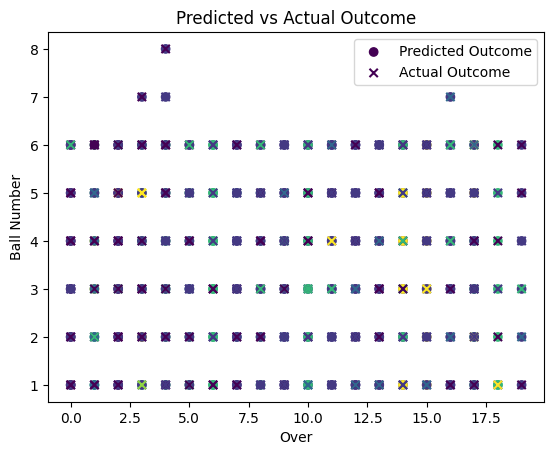

In [111]:
import matplotlib.pyplot as plt

# Sample DataFrame with predicted_outcome and actual_outcome columns
# Replace this with your actual DataFrame




# Scatter plot for predicted outcome
plt.scatter(predicted_selected_match_df['overs'], predicted_selected_match_df['ballnumber'], c=predicted_selected_match_df['predicted_outcome'], marker='o', label='Predicted Outcome')

# Scatter plot for actual outcome
plt.scatter(predicted_selected_match_df['overs'], predicted_selected_match_df['ballnumber'], c=predicted_selected_match_df['actual_outcome'], marker='x', label='Actual Outcome')

plt.xlabel('Over')
plt.ylabel('Ball Number')
plt.title('Predicted vs Actual Outcome')
plt.legend()
plt.show()


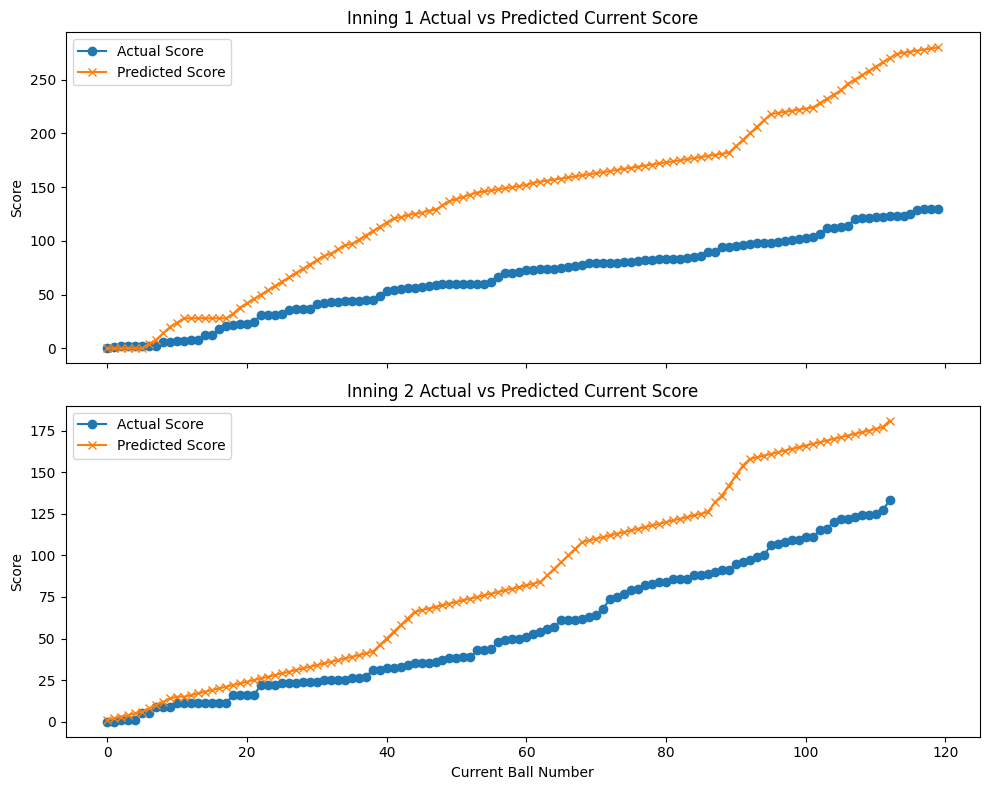

In [125]:
import matplotlib.pyplot as plt

# Sample DataFrame with current_score, predicted_current_score, balls_left, and innings columns
# Replace this with your actual DataFrame



# Separate data for each inning
inning1_data = predicted_selected_match_df[predicted_selected_match_df['innings'] == 1]
inning2_data = predicted_selected_match_df[predicted_selected_match_df['innings'] == 2]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# Plot for Inning 1
axes[0].plot(inning1_data['current_ball_number'], inning1_data['current_score'], marker='o', label='Actual Score')
axes[0].plot(inning1_data['current_ball_number'], inning1_data['predicted_current_score'], marker='x', label='Predicted Score')
axes[0].set_ylabel('Score')
axes[0].set_title('Inning 1 Actual vs Predicted Current Score')
axes[0].legend()

# Plot for Inning 2
axes[1].plot(inning2_data['current_ball_number'], inning2_data['current_score'], marker='o', label='Actual Score')
axes[1].plot(inning2_data['current_ball_number'], inning2_data['predicted_current_score'], marker='x', label='Predicted Score')
axes[1].set_xlabel('Current Ball Number')
axes[1].set_ylabel('Score')
axes[1].set_title('Inning 2 Actual vs Predicted Current Score')
axes[1].legend()

plt.tight_layout()
plt.show()
